In [17]:
# !pip install citipy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import scipy.stats as st
from citipy import citipy
from API_data import weather_api_key



In [2]:
coordinates = []
cities = []
city_api_data = []

lats = np.random.randint(-90,90,size=1400)
longs = np.random.randint(-180,180,size=1400)
coordinates = zip(lats,longs)

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    if city not in cities:
        cities.append(city)
# len(cities)

search_url = "http://api.openweathermap.org/data/2.5/find?q="
data_count = 0
for x, city in enumerate(cities):
    data_count = data_count + 1
    city_url = search_url + city + "&units=imperial&appid=" + weather_api_key
    print(f"Processing Record Number {data_count} for {city}")
    try:
        api_data = requests.get(city_url).json()
        
        city_lat = api_data["list"][0]["coord"]["lat"]
        city_temp = api_data["list"][0]["main"]["temp_max"]
        city_humidity = api_data["list"][0]["main"]["humidity"]
        city_cloudiness = api_data["list"][0]["clouds"]["all"]
        city_wind = api_data["list"][0]["wind"]["speed"]
        city_lon = api_data["list"][0]["coord"]["lon"]
        
        city_api_data.append({"City":city,"Lat":city_lat,"Lon":city_lon,"Temp":city_temp,"Humidity":city_humidity,"Cloudiness":city_cloudiness,"Wind Speed":city_wind})
    except:
        pass

Processing Record Number 1 for sorong
Processing Record Number 2 for broken hill
Processing Record Number 3 for herrin
Processing Record Number 4 for danilovka
Processing Record Number 5 for mahebourg
Processing Record Number 6 for mar del plata
Processing Record Number 7 for torbay
Processing Record Number 8 for nikolsk
Processing Record Number 9 for lakes entrance
Processing Record Number 10 for new norfolk
Processing Record Number 11 for tuktoyaktuk
Processing Record Number 12 for tasiilaq
Processing Record Number 13 for challans
Processing Record Number 14 for hilo
Processing Record Number 15 for padang
Processing Record Number 16 for albany
Processing Record Number 17 for atuona
Processing Record Number 18 for upernavik
Processing Record Number 19 for bousso
Processing Record Number 20 for mehamn
Processing Record Number 21 for barrow
Processing Record Number 22 for spornoye
Processing Record Number 23 for bambous virieux
Processing Record Number 24 for jamestown
Processing Record

Processing Record Number 196 for tungkang
Processing Record Number 197 for cidreira
Processing Record Number 198 for papara
Processing Record Number 199 for taltal
Processing Record Number 200 for ostrovnoy
Processing Record Number 201 for acapulco
Processing Record Number 202 for moa
Processing Record Number 203 for aktas
Processing Record Number 204 for deputatskiy
Processing Record Number 205 for isangel
Processing Record Number 206 for victoria
Processing Record Number 207 for erzin
Processing Record Number 208 for temaraia
Processing Record Number 209 for butaritari
Processing Record Number 210 for attawapiskat
Processing Record Number 211 for penzance
Processing Record Number 212 for virginia beach
Processing Record Number 213 for mocambique
Processing Record Number 214 for concord
Processing Record Number 215 for mackay
Processing Record Number 216 for loubomo
Processing Record Number 217 for egvekinot
Processing Record Number 218 for beringovskiy
Processing Record Number 219 fo

Processing Record Number 390 for vestmanna
Processing Record Number 391 for kholm
Processing Record Number 392 for kavieng
Processing Record Number 393 for sambava
Processing Record Number 394 for cua
Processing Record Number 395 for agirish
Processing Record Number 396 for carahue
Processing Record Number 397 for khor
Processing Record Number 398 for cocorit
Processing Record Number 399 for kamenskoye
Processing Record Number 400 for aklavik
Processing Record Number 401 for itarema
Processing Record Number 402 for sumbawa
Processing Record Number 403 for vostok
Processing Record Number 404 for rio grande
Processing Record Number 405 for gagnoa
Processing Record Number 406 for san patricio
Processing Record Number 407 for barra patuca
Processing Record Number 408 for peterhead
Processing Record Number 409 for flin flon
Processing Record Number 410 for la paz
Processing Record Number 411 for zahnitkiv
Processing Record Number 412 for evensk
Processing Record Number 413 for ruatoria
Proc

In [3]:
city_data_df = pd.DataFrame(city_api_data)
output_csv = "./city_output_data/city_data.csv"
city_data_df.to_csv(output_csv,index_label="City Number")
print(city_data_df.count())
city_data_df.head()

City          508
Lat           508
Lon           508
Temp          508
Humidity      508
Cloudiness    508
Wind Speed    508
dtype: int64


,City,Lat,Lon,Temp,Humidity,Cloudiness,Wind Speed
0,sorong,-0.8833,131.2500,76.08,87,71,6.29
1,broken hill,-31.9500,141.4333,32.00,76,0,6.24
2,herrin,37.8031,-89.0276,91.99,55,75,5.82
3,danilovka,50.3557,44.1168,80.38,29,87,10.20
4,mahebourg,-20.4081,57.7000,71.60,94,75,9.17


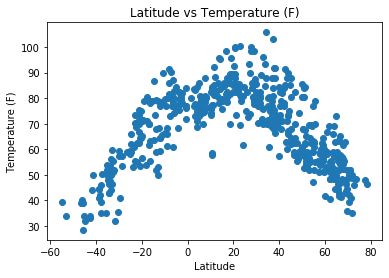

In [4]:
# Latitude vs Temp scatter plot
plt.scatter(city_data_df["Lat"],city_data_df["Temp"])
plt.title("Latitude vs Temperature (F)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.savefig("city_output_data/Scatter_1.png")

This plot shows that as you get closer to the equator (Latitude approaches 0), the average temperature in the selected cities rises significantly.

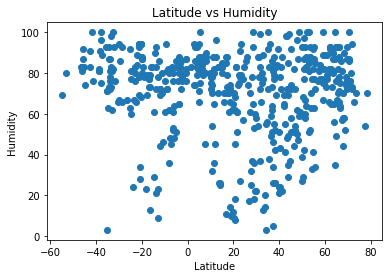

In [5]:
# Latitude vs Humidity scatter plot
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"])
plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("city_output_data/Scatter_2.png")

This plot shows the humidity in each selected city. There does not appear to be a strong correlation between latitutde and humidity shown on this graph.

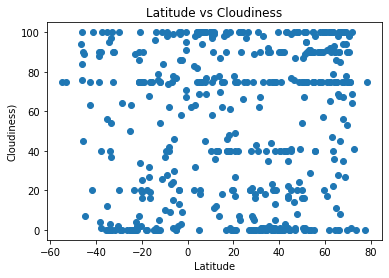

In [6]:
# Latitude vs Cloudiness scatter plot
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"])
plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness)")
plt.savefig("city_output_data/Scatter_3.png")

This plot shows the cloudiness of all selected cities. There does not appear to be any correlation between cloudiness and latitude show on this graph, however, many cities fall within the three groups of 0, 75, and 100 cloudiness, respectively.

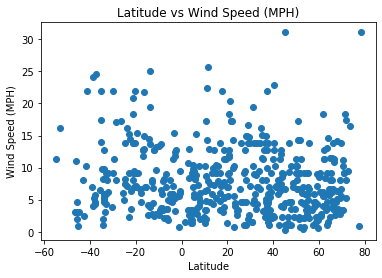

In [7]:
# Latitude vs Wind Speed scatter plot
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"])
plt.title("Latitude vs Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.savefig("city_output_data/Scatter_4.png")

This plot shows the wind speed of each selected city. There does not appear to be a correlation between wind speed and latitude shown on this graph.

In [12]:
# Split data into Northern and Southern Hemispheres
northern_data = city_data_df.loc[city_data_df["Lat"] > 0]
southern_data = city_data_df.loc[city_data_df["Lat"] < 0]

,City,Lat,Lon,Temp,Humidity,Cloudiness,Wind Speed
0,sorong,-0.8833,131.2500,76.08,87,71,6.29
1,broken hill,-31.9500,141.4333,32.00,76,0,6.24
4,mahebourg,-20.4081,57.7000,71.60,94,75,9.17
5,mar del plata,-38.0023,-57.5575,46.00,75,40,4.70
8,lakes entrance,-37.8811,147.9810,35.01,96,1,5.66


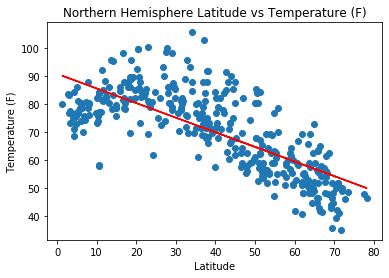

In [18]:
# Northern Hemisphere Temp vs Latitude scatter plot and linear regression
fig5,ax5 = plt.subplots()
ax5.scatter(northern_data["Lat"],northern_data["Temp"])
plt.title("Northern Hemisphere Latitude vs Temperature (F)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
# regression line
(slope,intercept,_,_,_) = st.linregress(northern_data["Lat"],northern_data["Temp"])
fit = slope * northern_data["Lat"] + intercept
ax5.plot(northern_data["Lat"],fit,"r")

plt.savefig("city_output_data/Regression1.png")

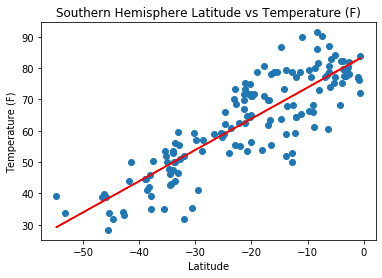

In [19]:
# Southern Hemisphere Temp vs Latitude scatter plot and linear regression
fig6,ax6 = plt.subplots()
ax6.scatter(southern_data["Lat"],southern_data["Temp"])
plt.title("Southern Hemisphere Latitude vs Temperature (F)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
# regression line
(slope,intercept,_,_,_) = st.linregress(southern_data["Lat"],southern_data["Temp"])
fit = slope * southern_data["Lat"] + intercept
ax6.plot(southern_data["Lat"],fit,"r")

plt.savefig("city_output_data/Regression2.png")

These 2 plots show the relation between temperature and latitude for the northern and southern hemispheres. It is clear that each hemisphere's temperature significantly increases as it approaches the equator (Latitude of 0).

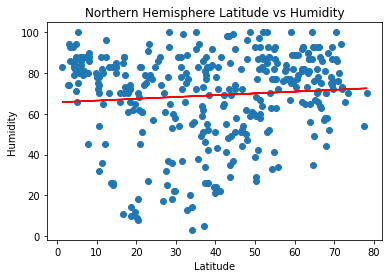

In [21]:
# Northern Hemisphere Humidity vs Latitude scatter plot and linear regression
fig7,ax7 = plt.subplots()
ax7.scatter(northern_data["Lat"],northern_data["Humidity"])
plt.title("Northern Hemisphere Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
# regression line
(slope,intercept,_,_,_) = st.linregress(northern_data["Lat"],northern_data["Humidity"])
fit = slope * northern_data["Lat"] + intercept
ax7.plot(northern_data["Lat"],fit,"r")

plt.savefig("city_output_data/Regression3.png")

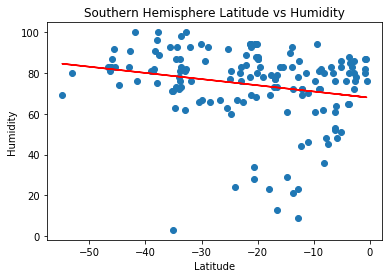

In [22]:
# Southern Hemisphere Humidity vs Latitude scatter plot and linear regression
fig8,ax8 = plt.subplots()
ax8.scatter(southern_data["Lat"],southern_data["Humidity"])
plt.title("Southern Hemisphere Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
# regression line
(slope,intercept,_,_,_) = st.linregress(southern_data["Lat"],southern_data["Humidity"])
fit = slope * southern_data["Lat"] + intercept
ax8.plot(southern_data["Lat"],fit,"r")

plt.savefig("city_output_data/Regression4.png")

These two plots show the relation between latitude and humidity for the northern and southern hemispheres. The humidity in both hemispheres appears to drop slightly as it approaches the equator.

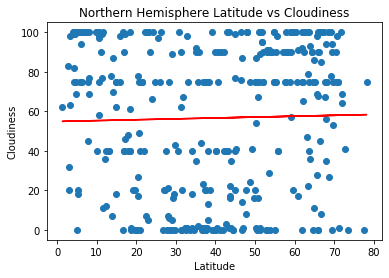

In [23]:
# Northern Hemisphere Cloudiness vs Latitude scatter plot and linear regression
fig9,ax9 = plt.subplots()
ax9.scatter(northern_data["Lat"],northern_data["Cloudiness"])
plt.title("Northern Hemisphere Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
# regression line
(slope,intercept,_,_,_) = st.linregress(northern_data["Lat"],northern_data["Cloudiness"])
fit = slope * northern_data["Lat"] + intercept
ax9.plot(northern_data["Lat"],fit,"r")

plt.savefig("city_output_data/Regression5.png")

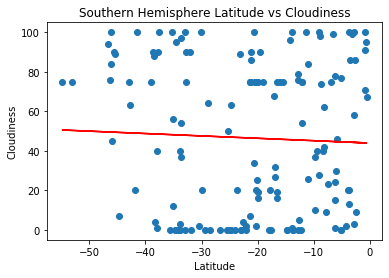

In [24]:
# Southern Hemisphere Cloudiness vs Latitude scatter plot and linear regression
fig10,ax10 = plt.subplots()
ax10.scatter(southern_data["Lat"],southern_data["Cloudiness"])
plt.title("Southern Hemisphere Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
# regression line
(slope,intercept,_,_,_) = st.linregress(southern_data["Lat"],southern_data["Cloudiness"])
fit = slope * southern_data["Lat"] + intercept
ax10.plot(southern_data["Lat"],fit,"r")

plt.savefig("city_output_data/Regression6.png")

These graphs show the relation between latitude and cloudiness in the northern and southern hemispheres. There does not appear to be a strong correlation between the two variables.

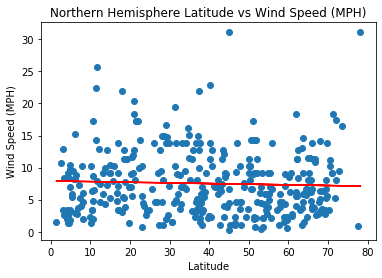

In [25]:
# Northern Hemisphere Wind Speed vs Latitude scatter plot and linear regression
fig11,ax11 = plt.subplots()
ax11.scatter(northern_data["Lat"],northern_data["Wind Speed"])
plt.title("Northern Hemisphere Latitude vs Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
# regression line
(slope,intercept,_,_,_) = st.linregress(northern_data["Lat"],northern_data["Wind Speed"])
fit = slope * northern_data["Lat"] + intercept
ax11.plot(northern_data["Lat"],fit,"r")

plt.savefig("city_output_data/Regression7.png")

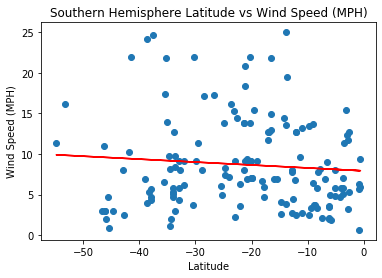

In [26]:
# Southern Hemisphere Wind Speed vs Latitude scatter plot and linear regression
fig12,ax12 = plt.subplots()
ax12.scatter(southern_data["Lat"],southern_data["Wind Speed"])
plt.title("Southern Hemisphere Latitude vs Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
# regression line
(slope,intercept,_,_,_) = st.linregress(southern_data["Lat"],southern_data["Wind Speed"])
fit = slope * southern_data["Lat"] + intercept
ax12.plot(southern_data["Lat"],fit,"r")

plt.savefig("city_output_data/Regression8.png")

These two graphs show the wind speed compared to latitude of cities in the northern and southern hemispheres. There doesn't appear to be correlation based on these graphs.